In [151]:
#Importimg all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [152]:
#Importing the dataset
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
# Looking at the structure of dataset and finding NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [154]:
#Removing the NULL values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
#Dropping NULL values
df = df.dropna(subset=['Gender'])
df = df.dropna(subset=['Dependents'])
df = df.dropna(subset=['Self_Employed'])
df = df.dropna(subset=['Credit_History'])

In [156]:
#Filling NULL values with interppolate
df['LoanAmount'] = df['LoanAmount'].interpolate()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].interpolate()

In [157]:
#Checking for NULL values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [158]:
#Finding one row with NULL value
df[df.isnull().any(axis=1)].iloc[0]

Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [159]:
#Deleting the row with NULL value
df = df.drop(df[df['Loan_ID'] == 'LP001002'].index)

In [160]:
#Checking for NULL values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            510 non-null    object 
 1   Gender             510 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         510 non-null    object 
 4   Education          510 non-null    object 
 5   Self_Employed      510 non-null    object 
 6   ApplicantIncome    510 non-null    int64  
 7   CoapplicantIncome  510 non-null    float64
 8   LoanAmount         510 non-null    float64
 9   Loan_Amount_Term   510 non-null    float64
 10  Credit_History     510 non-null    float64
 11  Property_Area      510 non-null    object 
 12  Loan_Status        510 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 55.8+ KB


In [162]:
# Looking at the distribution of dataset

In [163]:
#Distribution of Married
df.Married.value_counts(dropna=False)

Yes    331
No     179
Name: Married, dtype: int64

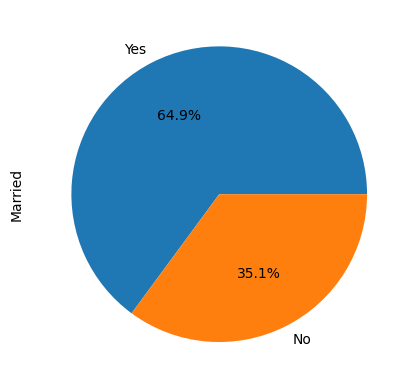

In [164]:
# create a pie chart
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# show the chart
plt.show()

In [165]:
#Distribution of Gender
df.Gender.value_counts(dropna = False)

Male      419
Female     91
Name: Gender, dtype: int64

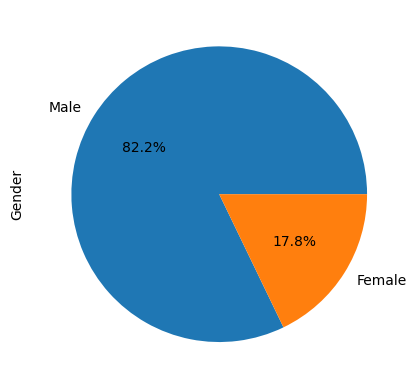

In [166]:
# create a pie chart
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# show the chart
plt.show()

In [167]:
#Distribution of Dependents
df.Dependents.value_counts(dropna = False)

0     293
2      88
1      85
3+     44
Name: Dependents, dtype: int64

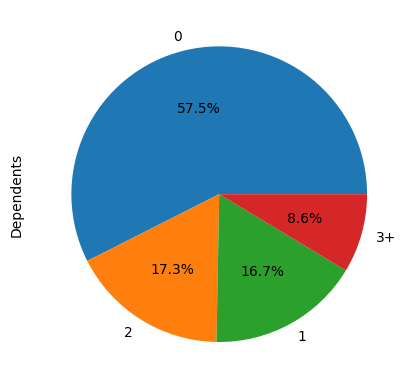

In [168]:
# create a pie chart
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# show the chart
plt.show()

In [169]:
#Distribution of Education
df.Education.value_counts(dropna = False)

Graduate        400
Not Graduate    110
Name: Education, dtype: int64

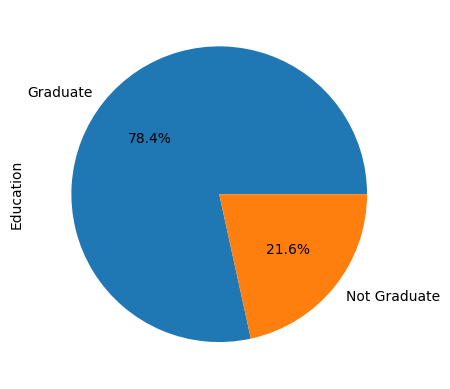

In [170]:
# create a pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# show the chart
plt.show()

In [171]:
#Distribution of Self Employement
df.Self_Employed.value_counts(dropna = False)

No     440
Yes     70
Name: Self_Employed, dtype: int64

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\2271821715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


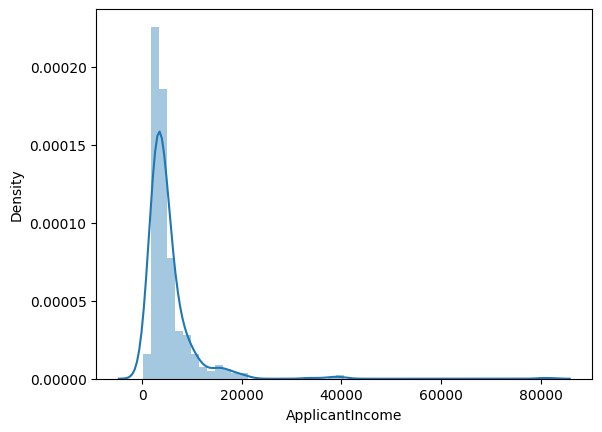

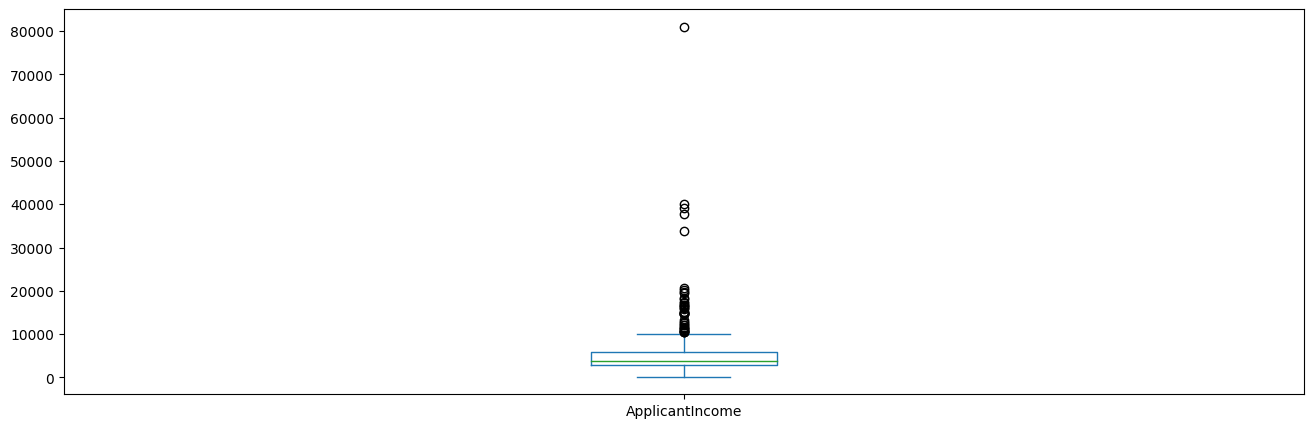

In [172]:
#Distribution of Applicant Income
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [173]:
#Here we can see transformation is skewed I will use log transform to remove these outliers on the higher side
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\2271821715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


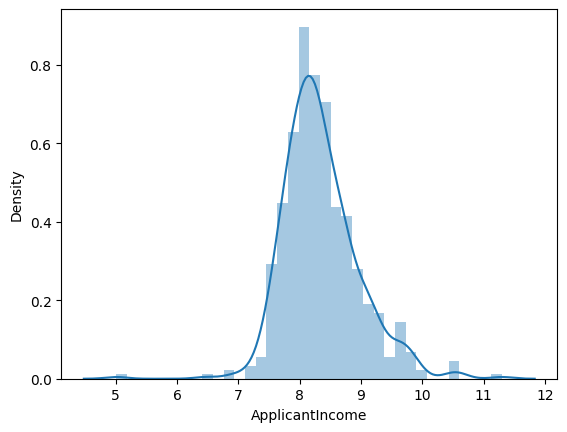

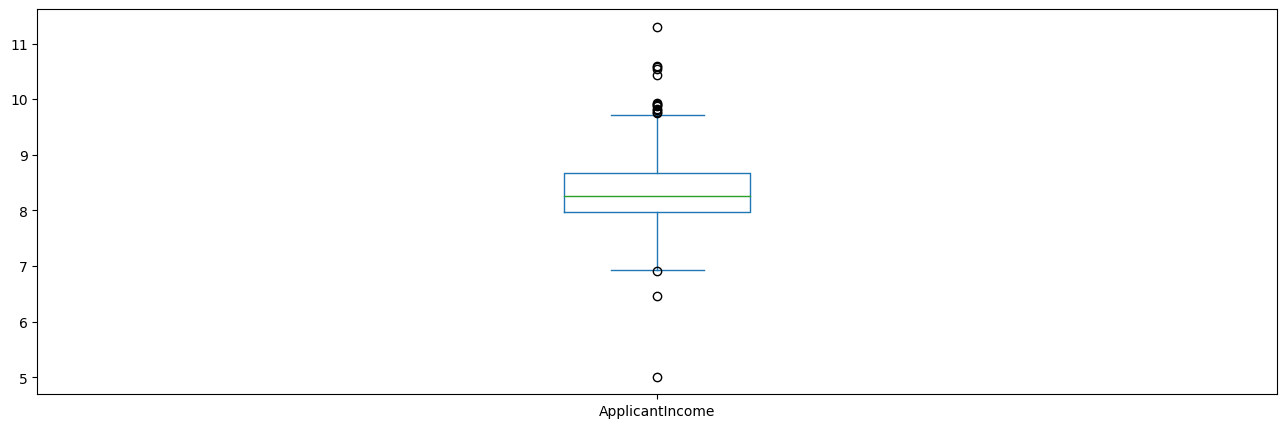

In [174]:
#Distribution of Applicant Income
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\1476674995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


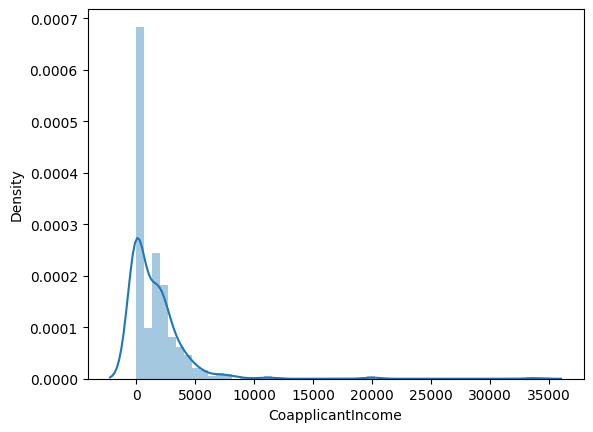

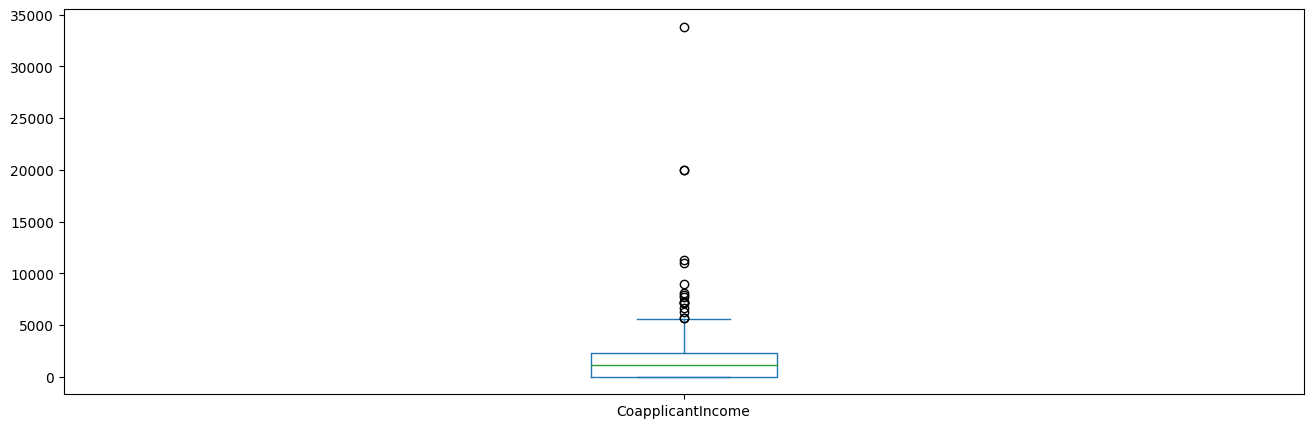

In [175]:
#Distribution of Coapplicant Income
sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\3453167686.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


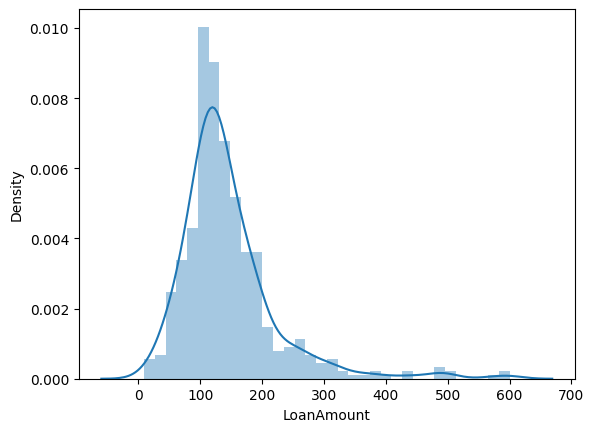

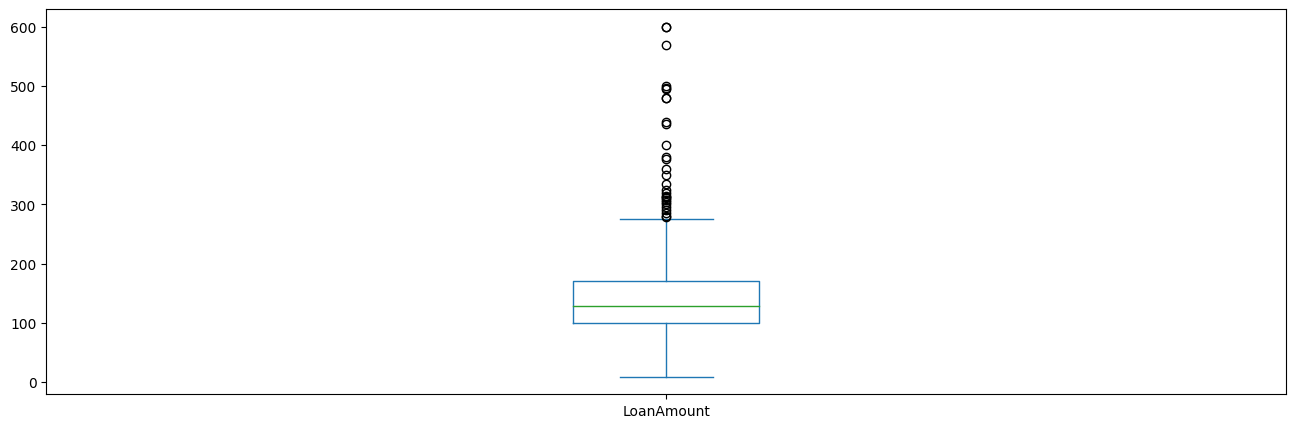

In [176]:
#Distribution of Loan Amount
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [177]:
#Here we can see transformation is skewed I will use log transform to remove these outliers on the higher side
df['LoanAmount'] = np.log(df['LoanAmount'])

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\3453167686.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


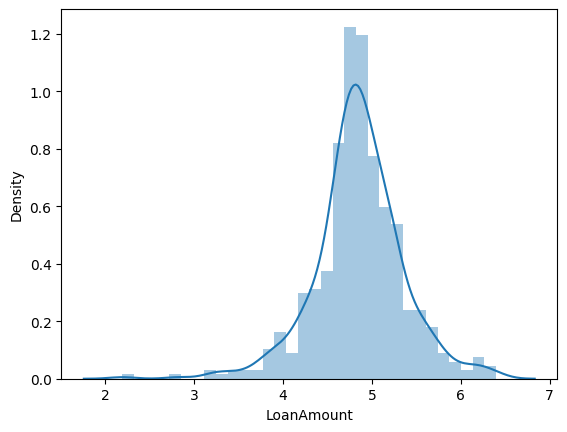

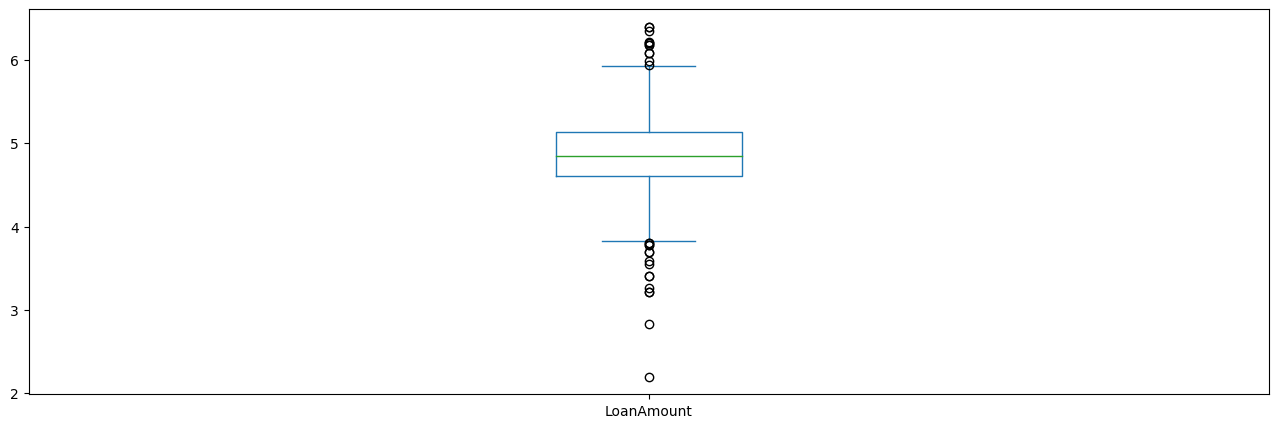

In [178]:
#Distribution of Loan Amount
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\3617804875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


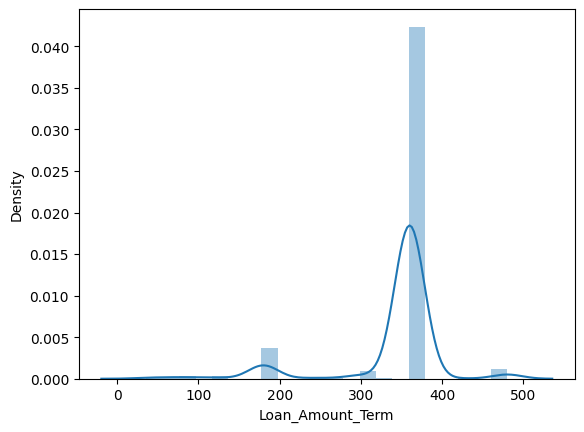

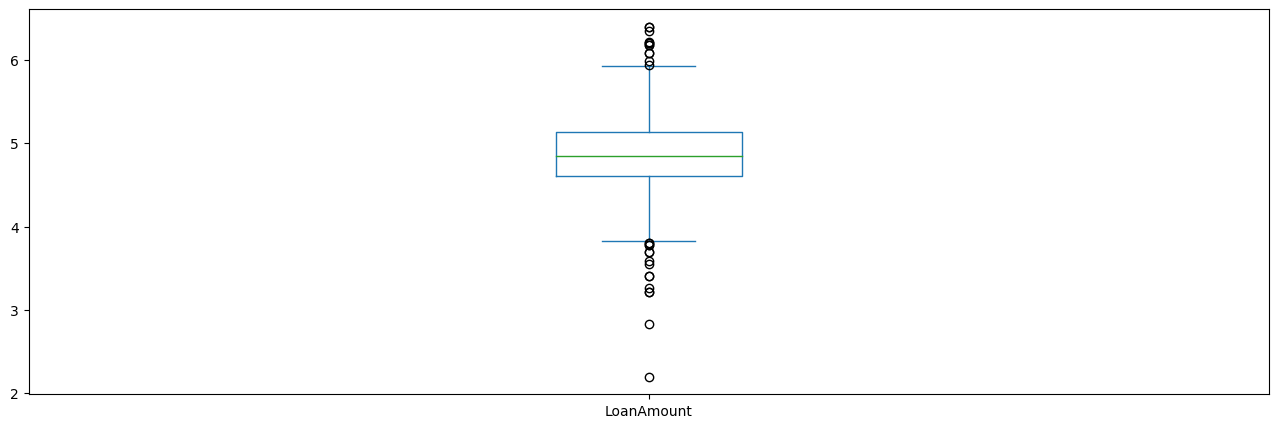

In [179]:
#Distribution of Loan Amount Term
sns.distplot(df['Loan_Amount_Term'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [180]:
#Distribution of Credit History
df.Credit_History.value_counts(dropna = False)

1.0    430
0.0     80
Name: Credit_History, dtype: int64

In [181]:
df['Credit_History'] = df['Credit_History'].astype('category')

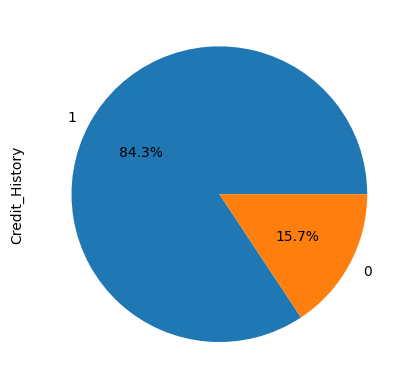

In [221]:
# create a pie chart
df['Credit_History'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# show the chart
plt.show()

In [183]:
#Data Visualization
#Checking for Gender Bias
gender_table = pd.crosstab(df['Gender'], df['Loan_Status'])
gender_table

Loan_Status,N,Y
Gender,,
Female,34,57
Male,130,289


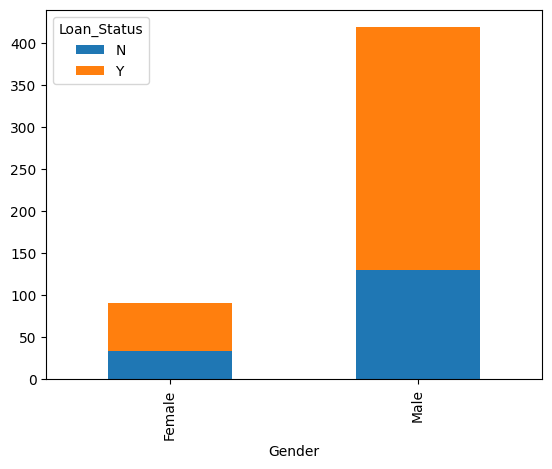

In [184]:
#here we can see that we got equal distribution of Loan Status cases in both gender
gender_table.plot(kind='bar', stacked=True)
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_37200\3948940810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.1)


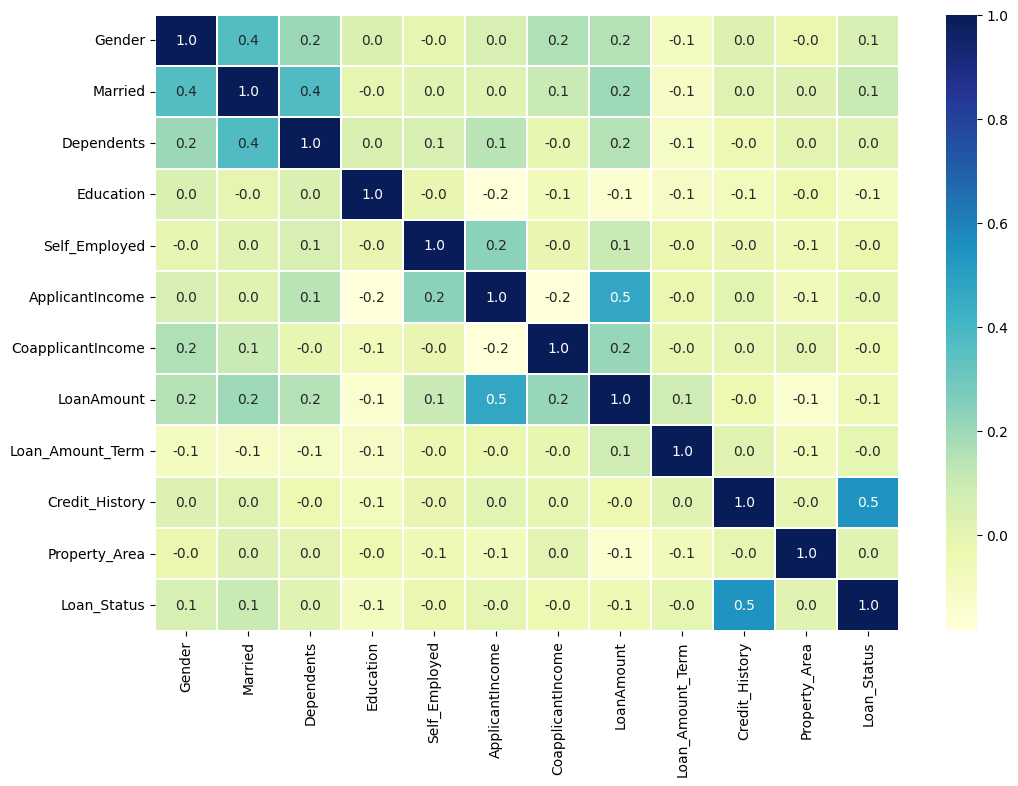

In [223]:
#Correlation matrix to find which columns are correlated to Loan_Status
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.1)
plt.show()

In [186]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,8.597297,4196.0,5.587249,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.0,4.262680,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,0.0,3.688879,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8.996157,240.0,5.533389,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.0,5.231109,360.0,1.0,Urban,Y


In [187]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,8.597297,4196.0,5.587249,360.0,1.0,Urban,Y


In [188]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,510.000000,510.000000,510.000000,510.000000
mean,8.346045,1565.060627,4.853268,342.282353
std,0.617366,2560.958538,0.503759,64.369137
min,5.010635,0.000000,2.197225,36.000000
25%,7.966846,0.000000,4.605170,360.000000
50%,8.256866,1105.500000,4.852030,360.000000
75%,8.668841,2253.750000,5.135798,360.000000
max,11.302204,33837.000000,6.396930,480.000000


In [189]:
#Converting everything to categorical values
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            510 non-null    object  
 1   Gender             510 non-null    category
 2   Married            510 non-null    category
 3   Dependents         510 non-null    category
 4   Education          510 non-null    category
 5   Self_Employed      510 non-null    category
 6   ApplicantIncome    510 non-null    float64 
 7   CoapplicantIncome  510 non-null    float64 
 8   LoanAmount         510 non-null    float64 
 9   Loan_Amount_Term   510 non-null    float64 
 10  Credit_History     510 non-null    category
 11  Property_Area      510 non-null    category
 12  Loan_Status        510 non-null    category
dtypes: category(8), float64(4), object(1)
memory usage: 28.9+ KB


In [191]:
#Label Encoding categorical features

# Define a label encoder object
le = LabelEncoder()

# Apply label encoding to each categorical feature
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Credit_History'] = le.fit_transform(df['Credit_History'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [192]:
#Creating final train and test

# Split data into training and testing sets
final_train_data, final_test_data = train_test_split(df, test_size=0.20, random_state=42, stratify=df['Loan_Status'])

# Split data into features and target variable
X = final_train_data.drop(['Loan_Status','Loan_ID'], axis=1)
y = final_train_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [193]:
final_train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
428,LP002369,1,1,0,0,0,7.979339,16.120001,4.465908,360.0,1,0,1
450,LP002446,1,1,2,1,0,7.744570,1255.000000,4.828314,360.0,0,0,0
61,LP001206,1,1,3,0,0,8.015988,0.000000,4.595120,360.0,1,2,1
610,LP002979,1,1,3,0,0,8.320205,0.000000,3.688879,180.0,1,0,1
203,LP001688,1,1,1,1,0,8.160518,1083.000000,4.905275,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,LP001098,1,1,0,0,0,8.160518,1667.000000,4.736198,360.0,1,1,1
273,LP001894,1,1,0,0,0,7.870930,2223.000000,5.010635,360.0,1,1,1
520,LP002689,1,1,2,1,0,7.692570,1742.000000,3.806662,360.0,1,1,1
456,LP002459,1,1,0,0,0,8.366603,0.000000,4.770685,360.0,1,2,1


In [194]:
final_test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
175,LP001606,1,1,0,0,0,8.159661,1964.0,4.753590,360.0,1,0,1
320,LP002051,1,1,0,0,0,7.783224,2167.0,4.744932,360.0,1,1,1
596,LP002941,1,1,2,1,1,8.761393,1000.0,5.231109,360.0,1,0,0
573,LP002862,1,1,2,1,0,8.720134,1625.0,5.231109,480.0,1,1,0
63,LP001213,1,1,1,0,0,8.506132,0.0,4.945207,360.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,LP002191,1,1,0,0,0,9.889896,5266.0,6.345636,360.0,1,0,0
96,LP001327,0,1,0,0,0,7.817625,2302.0,4.919981,360.0,1,1,1
384,LP002236,1,1,2,0,0,8.426393,0.0,4.605170,360.0,1,2,0
504,LP002619,1,1,0,1,0,8.246434,1483.0,4.820282,300.0,1,1,1


In [195]:
### Decision Tree

In [196]:
# Define the parameter grid to search over
param_grid = {'ccp_alpha': np.linspace(0, 1, 50), 'min_samples_leaf': range(1, 10)}

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the grid search object
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
model_decision_tree = grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters: ", model_decision_tree.best_params_)
print("Best accuracy score: ", model_decision_tree.best_score_)


Best parameters:  {'ccp_alpha': 0.02040816326530612, 'min_samples_leaf': 1}
Best accuracy score:  0.7914685314685315


In [197]:
y_pred = model_decision_tree.predict(X_test)

# Print the predicted classes
print("Predicted classes:")
print(y_pred)

Predicted classes:
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1]


In [198]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[10 14]
 [ 0 58]]


In [199]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score on training data: ", accuracy)


Accuracy score on training data:  0.8292682926829268


In [200]:
##### Naives Bayes

In [201]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Define the Naive Bayes classifier
nb = GaussianNB()

# Define the grid search object
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
model_Naive_Bayes = grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", model_Naive_Bayes.best_params_)
print("Best score: ", model_Naive_Bayes.best_score_)


Best parameters:  {'var_smoothing': 1e-08}
Best score:  0.7791608391608392


In [202]:
y_pred = model_Naive_Bayes.predict(X_test)

# Print the predicted classes
print("Predicted classes:")
print(y_pred)

# Generate the confusion matrix for the predictions
cm2 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm2)


Predicted classes:
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1]
Confusion matrix:
[[10 14]
 [ 2 56]]


In [203]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score on training data: ", accuracy)


Accuracy score on training data:  0.8048780487804879


In [204]:
#Logistic Regression

In [205]:
# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
model_Logistic_Regression = grid_search.fit(X_train, y_train)

C:\Users\tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [206]:
# Print the best parameters and best score
print("Best parameters: ", model_Logistic_Regression.best_params_)
print("Best score: ", model_Logistic_Regression.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l2'}
Best score:  0.7822843822843824


In [207]:
y_pred = model_Logistic_Regression.predict(X_test)

# Print the predicted classes
print("Predicted classes:")
print(y_pred)

# Generate the confusion matrix for the predictions
cm3 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm3)


Predicted classes:
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1]
Confusion matrix:
[[10 14]
 [ 0 58]]


In [208]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score on training data: ", accuracy)


Accuracy score on training data:  0.8292682926829268


In [209]:
### Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest model
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
model_random_forest = grid_search.fit(X_train, y_train)

best_model_rf = RandomForestClassifier(n_estimators=model_random_forest.best_params_['n_estimators'],
                                  max_features=model_random_forest.best_params_['max_features'])

final_rf = best_model_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", model_random_forest.best_params_)
print("Train Score: ", model_random_forest.best_score_)

Best Parameters:  {'max_features': 'log2', 'n_estimators': 100}
Train Score:  0.7607925407925409


In [211]:
y_pred = best_model_rf.predict(X_test)

# Print the predicted classes
print("Predicted classes:")
print(y_pred)

# Generate the confusion matrix for the predictions
cm4 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm4)

Predicted classes:
[1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1]
Confusion matrix:
[[14 10]
 [ 0 58]]


In [212]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score on training data: ", accuracy)


Accuracy score on training data:  0.8780487804878049


In [213]:
#Test on final test data

In [214]:
final_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
175,LP001606,1,1,0,0,0,8.159661,1964.0,4.753590,360.0,1,0,1
320,LP002051,1,1,0,0,0,7.783224,2167.0,4.744932,360.0,1,1,1
596,LP002941,1,1,2,1,1,8.761393,1000.0,5.231109,360.0,1,0,0
573,LP002862,1,1,2,1,0,8.720134,1625.0,5.231109,480.0,1,1,0
63,LP001213,1,1,1,0,0,8.506132,0.0,4.945207,360.0,0,0,0


In [215]:
final_test_data_predictor = final_test_data.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [ ]:
### Testing on final testing dataset

In [216]:
y_pred_Decision_Tree = model_decision_tree.predict(final_test_data_predictor)
accuracy1 = accuracy_score(final_test_data['Loan_Status'], y_pred_Decision_Tree)
print("Accuracy score on training data: ", accuracy1)

Accuracy score on training data:  0.8431372549019608


In [217]:
y_pred_Naive_Bayes = model_Naive_Bayes.predict(final_test_data_predictor)
accuracy2 = accuracy_score(final_test_data['Loan_Status'], y_pred_Naive_Bayes)
print("Accuracy score on training data: ", accuracy2)

Accuracy score on training data:  0.8235294117647058


In [218]:
y_pred_Logistic_regression = model_Logistic_Regression.predict(final_test_data_predictor)
accuracy3 = accuracy_score(final_test_data['Loan_Status'], y_pred_Logistic_regression)
print("Accuracy score on training data: ", accuracy3)

Accuracy score on training data:  0.8431372549019608


In [219]:
y_pred_random_forest = model_random_forest.predict(final_test_data_predictor)
accuracy4 = accuracy_score(final_test_data['Loan_Status'], y_pred_random_forest)
print("Accuracy score on training data: ", accuracy4)

Accuracy score on training data:  0.8431372549019608


<AxesSubplot: >

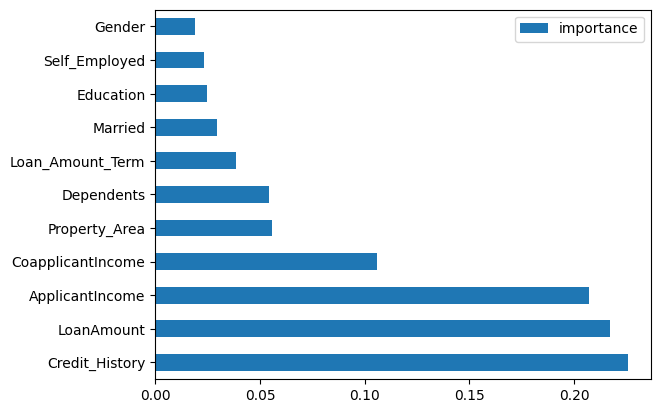

In [220]:
#Using Random Forest trained model to find important features to classify the accepted and rejected loan applicants.
importances = pd.DataFrame(final_rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
importances.plot.barh()